In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [ ]:
file_path = 'C:/Users/Checkout/Desktop/SQL/data/social_data.xlsx'
data = pd.read_excel(file_path)
data.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0.0,0.0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0.0,0.0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0.0,0.0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0.0,0.0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video


# Data Cleaning


In [ ]:
data.isnull().sum()

Published Date       0
Account              0
Account Type         0
Campaign Name        0
Total Impressions    0
Total Engagements    0
Media Type           0
dtype: int64

In [ ]:
data.isna().sum()

Published Date       0
Account              0
Account Type         0
Campaign Name        0
Total Impressions    0
Total Engagements    0
Media Type           0
dtype: int64

# Exploratory Data Analysis

In [ ]:
data['Date'] = data['Published Date'].dt.date
data['Hour'] = data['Published Date'].dt.strftime('%H')
col = ['Published Date']
data = data.drop(columns = col)
data


,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Date,Hour
0,CSGO,TWITTER,N/A,0.0,0.0,Text,2023-03-31,19
1,CSGO,TWITTER,N/A,0.0,0.0,Text,2023-03-31,19
2,CSGO,TWITTER,N/A,0.0,0.0,Text,2023-03-31,19
3,CSGO,TWITTER,N/A,0.0,0.0,Text,2023-03-31,19
4,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video,2023-03-31,19
...,...,...,...,...,...,...,...,...
3474,CSGO,TWITTER,N/A,0.0,0.0,Link,2023-01-03,10
3475,CSGO,TWITTER,N/A,0.0,0.0,Link,2023-01-03,10
3476,CSGO,TWITTER,N/A,0.0,0.0,Link,2023-01-03,10
3477,CSGO,TWITTER,N/A,2116.0,42.0,Text,2023-01-03,10


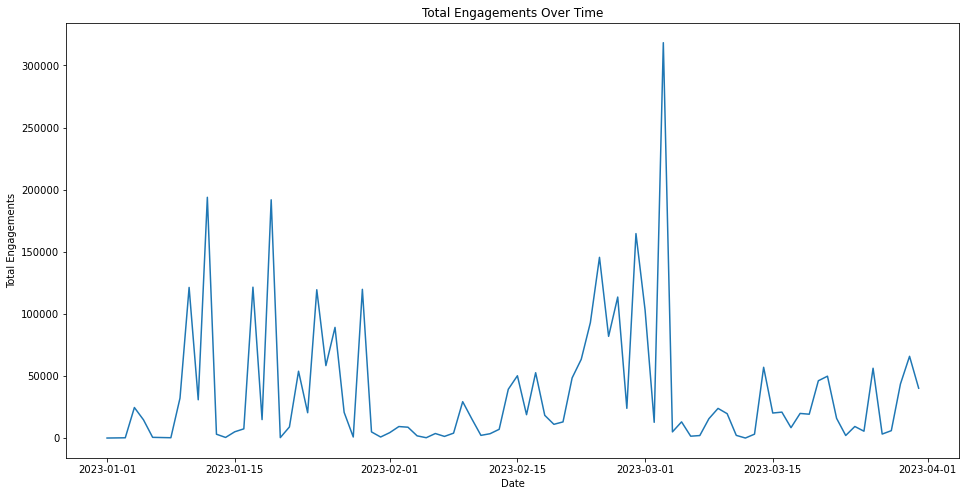

In [ ]:
engagements_over_time = data.groupby('Date')['Total Engagements'].sum()
plt.rcParams['figure.figsize'] = [16, 8]
engagements_over_time.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Total Engagements')
plt.title('Total Engagements Over Time')
plt.show()


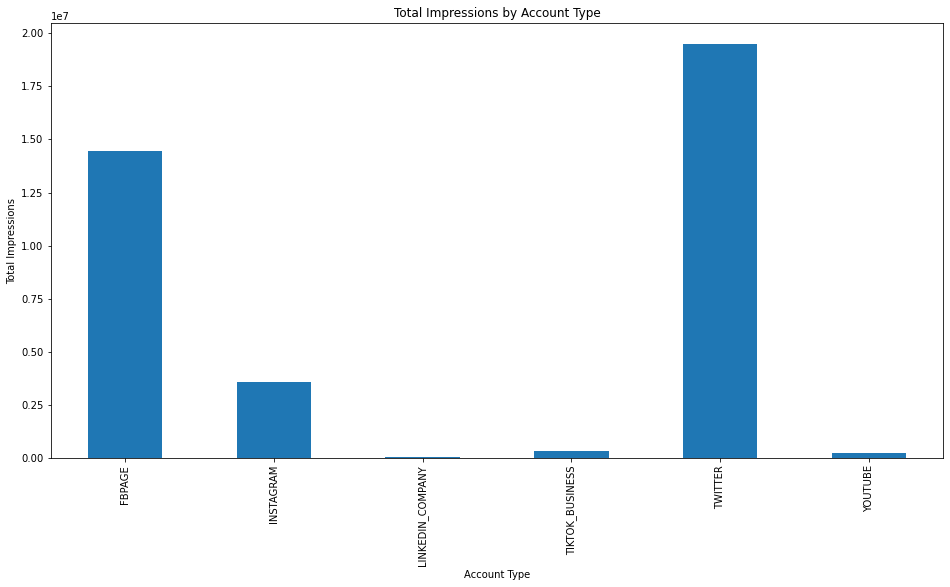

In [ ]:
impressions_by_type = data.groupby('Account Type')['Total Impressions'].sum()
plt.rcParams['figure.figsize'] = [16,8]
impressions_by_type.plot(kind='bar')
plt.xlabel('Account Type')
plt.ylabel('Total Impressions')
plt.title('Total Impressions by Account Type')
plt.show()

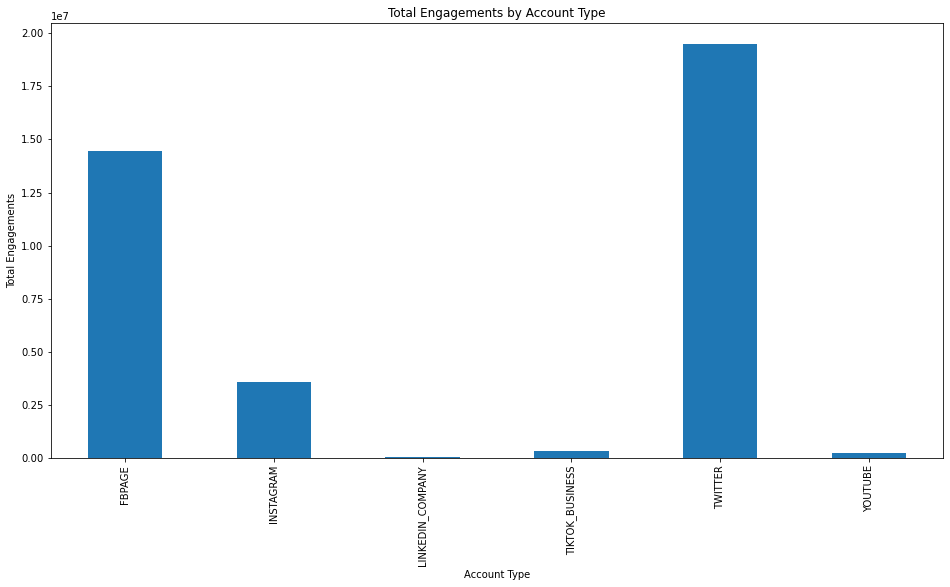

In [ ]:
engagements_by_type = data.groupby('Account Type')['Total Engagements'].sum()
plt.rcParams['figure.figsize'] = [16,8]
impressions_by_type.plot(kind='bar')
plt.xlabel('Account Type')
plt.ylabel('Total Engagements')
plt.title('Total Engagements by Account Type')
plt.show()

# Task 1
#### What is the typical engagement rate we can expect? What’s the likelihood that we can achieve a 15% engagement rate?

In [ ]:
data['Engagement Rate'] = (data['Total Engagements'] / data['Total Impressions']) * 100
data1 = data
data1

,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Date,Hour,Engagement Rate
0,CSGO,TWITTER,N/A,0.0,0.0,Text,2023-03-31,19,NaN
1,CSGO,TWITTER,N/A,0.0,0.0,Text,2023-03-31,19,NaN
2,CSGO,TWITTER,N/A,0.0,0.0,Text,2023-03-31,19,NaN
3,CSGO,TWITTER,N/A,0.0,0.0,Text,2023-03-31,19,NaN
4,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video,2023-03-31,19,12.766628
...,...,...,...,...,...,...,...,...,...
3474,CSGO,TWITTER,N/A,0.0,0.0,Link,2023-01-03,10,NaN
3475,CSGO,TWITTER,N/A,0.0,0.0,Link,2023-01-03,10,NaN
3476,CSGO,TWITTER,N/A,0.0,0.0,Link,2023-01-03,10,NaN
3477,CSGO,TWITTER,N/A,2116.0,42.0,Text,2023-01-03,10,1.984877


### Null Engagement Rate values are dropped

In [ ]:
data2 = data1.dropna()
data2

,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Date,Hour,Engagement Rate
4,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video,2023-03-31,19,12.766628
6,CSGO,TWITTER,Community Engagement,1882.0,83.0,Photo,2023-03-31,19,4.410202
7,CSGO,TWITTER,Community Engagement,17892.0,3076.0,Video,2023-03-31,19,17.192041
9,CSGO,TWITTER,Community Engagement,13874.0,1447.0,Video,2023-03-31,18,10.429581
10,General,FBPAGE,Community Engagement,37692.0,8044.0,Photo,2023-03-31,18,21.341399
...,...,...,...,...,...,...,...,...,...
3463,General,TWITTER,N/A,393.0,18.0,Text,2023-01-04,13,4.580153
3464,General,TWITTER,Community Engagement,136660.0,2371.0,Photo,2023-01-04,13,1.734963
3465,General,FBPAGE,Community Engagement,29051.0,811.0,Photo,2023-01-04,13,2.791642
3470,General,TWITTER,N/A,7704.0,153.0,Text,2023-01-03,13,1.985981


### Average Engagement Rate for the data is 40.49%

In [ ]:
engagement_data = data2['Engagement Rate'] 
average_engagement_rate = engagement_data.mean()
print("Average Engagement Rate: {:.2f}%".format(average_engagement_rate))



Average Engagement Rate: 40.49%


### Outliers for engagement rate have been discovered 
### Engagement rate > 100 has been considered as outlier

In [ ]:
numerical_data = data2['Engagement Rate']
bins = range(0, int(numerical_data.max()) + 101, 100)
value_counts = pd.cut(numerical_data, bins=bins, right=False).value_counts().sort_index()
for i, count in enumerate(value_counts):
  if count >0:
    print(f"Values in Range {i * 100} - {(i+1) * 100 - 1}: {count}")


Values in Range 0 - 99: 2731
Values in Range 100 - 199: 1
Values in Range 800 - 899: 1
Values in Range 1200 - 1299: 1
Values in Range 94000 - 94099: 1


### Data consisting of Engagement Rate < 100 has been considered

In [ ]:
data_out = data2[(data2['Engagement Rate'] < 100)]
data_out

,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Date,Hour,Engagement Rate
4,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video,2023-03-31,19,12.766628
6,CSGO,TWITTER,Community Engagement,1882.0,83.0,Photo,2023-03-31,19,4.410202
7,CSGO,TWITTER,Community Engagement,17892.0,3076.0,Video,2023-03-31,19,17.192041
9,CSGO,TWITTER,Community Engagement,13874.0,1447.0,Video,2023-03-31,18,10.429581
10,General,FBPAGE,Community Engagement,37692.0,8044.0,Photo,2023-03-31,18,21.341399
...,...,...,...,...,...,...,...,...,...
3463,General,TWITTER,N/A,393.0,18.0,Text,2023-01-04,13,4.580153
3464,General,TWITTER,Community Engagement,136660.0,2371.0,Photo,2023-01-04,13,1.734963
3465,General,FBPAGE,Community Engagement,29051.0,811.0,Photo,2023-01-04,13,2.791642
3470,General,TWITTER,N/A,7704.0,153.0,Text,2023-01-03,13,1.985981


### Average Engagement Rate is 5.31%  

In [ ]:
engagement_data = data_out['Engagement Rate'] 
average_engagement_rate = engagement_data.mean()
print("Average Engagement Rate: {:.2f}%".format(average_engagement_rate))

Average Engagement Rate: 5.31%


### To acheieve an engagement rate of 15% data consisting of engagement rate of 10 to 30 is considered and analysis has been made on that data.


In [ ]:
data3 = data2[(data2['Engagement Rate'] > 10) & (data2['Engagement Rate'] < 30)]
data3

,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Date,Hour,Engagement Rate
4,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video,2023-03-31,19,12.766628
7,CSGO,TWITTER,Community Engagement,17892.0,3076.0,Video,2023-03-31,19,17.192041
9,CSGO,TWITTER,Community Engagement,13874.0,1447.0,Video,2023-03-31,18,10.429581
10,General,FBPAGE,Community Engagement,37692.0,8044.0,Photo,2023-03-31,18,21.341399
11,DOTA2,TWITTER,N/A,1013.0,153.0,Link,2023-03-31,18,15.103653
...,...,...,...,...,...,...,...,...,...
3376,DOTA2,TWITTER,N/A,22013.0,4465.0,Video,2023-01-10,14,20.283469
3414,General,FBPAGE,N/A,33609.0,5042.0,Video,2023-01-10,09,15.001934
3421,DOTA2,TWITTER,N/A,837.0,101.0,Video,2023-01-09,15,12.066906
3433,General,FBPAGE,N/A,107752.0,29860.0,Text,2023-01-09,10,27.711783


### Distibution of Engagement Rates 

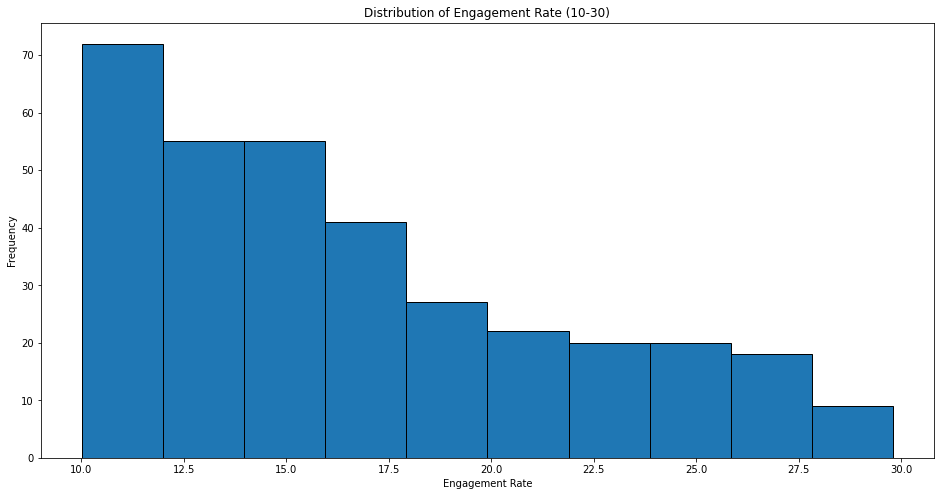

In [ ]:
plt.hist(data3['Engagement Rate'], bins=10, edgecolor='black')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Engagement Rate (10-30)')
plt.show()

### The average engagement rate is 16.75% after removing the outliers


In [ ]:
engagement_data = data3['Engagement Rate']  # Replace 'engagement_column' with the actual column name
average_engagement_rate = engagement_data.mean()
print("Average Engagement Rate: {:.2f}%".format(average_engagement_rate))

Average Engagement Rate: 16.75%


In [ ]:
data3

,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Date,Hour,Engagement Rate
4,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video,2023-03-31,19,12.766628
7,CSGO,TWITTER,Community Engagement,17892.0,3076.0,Video,2023-03-31,19,17.192041
9,CSGO,TWITTER,Community Engagement,13874.0,1447.0,Video,2023-03-31,18,10.429581
10,General,FBPAGE,Community Engagement,37692.0,8044.0,Photo,2023-03-31,18,21.341399
11,DOTA2,TWITTER,N/A,1013.0,153.0,Link,2023-03-31,18,15.103653
...,...,...,...,...,...,...,...,...,...
3376,DOTA2,TWITTER,N/A,22013.0,4465.0,Video,2023-01-10,14,20.283469
3414,General,FBPAGE,N/A,33609.0,5042.0,Video,2023-01-10,09,15.001934
3421,DOTA2,TWITTER,N/A,837.0,101.0,Video,2023-01-09,15,12.066906
3433,General,FBPAGE,N/A,107752.0,29860.0,Text,2023-01-09,10,27.711783


In [ ]:
data3['Campaign Name'].value_counts()

Community Engagement     212
N/A                      119
Evergreen                  4
Evil Exhibited             4
Name: Campaign Name, dtype: int64

In [ ]:
data3['Account Type'].value_counts()

FBPAGE             230
TWITTER             93
TIKTOK_BUSINESS     10
YOUTUBE              4
INSTAGRAM            2
Name: Account Type, dtype: int64

In [ ]:
data3['Media Type'].value_counts()

Photo    176
Video    119
Text      40
Link       2
Mixed      2
Name: Media Type, dtype: int64

In [ ]:
data4 = data3[(data3['Account Type'] == 'FBPAGE') | (data3['Account Type'] == 'TWITTER')]
data4

,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Date,Hour,Engagement Rate
4,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video,2023-03-31,19,12.766628
7,CSGO,TWITTER,Community Engagement,17892.0,3076.0,Video,2023-03-31,19,17.192041
9,CSGO,TWITTER,Community Engagement,13874.0,1447.0,Video,2023-03-31,18,10.429581
10,General,FBPAGE,Community Engagement,37692.0,8044.0,Photo,2023-03-31,18,21.341399
11,DOTA2,TWITTER,N/A,1013.0,153.0,Link,2023-03-31,18,15.103653
...,...,...,...,...,...,...,...,...,...
3376,DOTA2,TWITTER,N/A,22013.0,4465.0,Video,2023-01-10,14,20.283469
3414,General,FBPAGE,N/A,33609.0,5042.0,Video,2023-01-10,09,15.001934
3421,DOTA2,TWITTER,N/A,837.0,101.0,Video,2023-01-09,15,12.066906
3433,General,FBPAGE,N/A,107752.0,29860.0,Text,2023-01-09,10,27.711783


### Stats of data with FBPAGE and TWITTER as account types 

In [ ]:
data4['Campaign Name'].value_counts()

Community Engagement     205
N/A                      113
Evil Exhibited             3
Evergreen                  2
Name: Campaign Name, dtype: int64

In [ ]:
data4['Media Type'].value_counts()

Photo    174
Video    105
Text      40
Link       2
Mixed      2
Name: Media Type, dtype: int64

In [ ]:
engagement_data = data4['Engagement Rate'] 
average_engagement_rate = engagement_data.mean()
print("Average Engagement Rate: {:.2f}%".format(average_engagement_rate))

Average Engagement Rate: 16.89%


### For the liklihood of getting a 15% of Engagement rate 

*   Total rows considered: 3479
*   Average engagement rate: 40.49%
*   Rows with engagement rate of 0 excluded: 2735 rows remaining
*   Engagement rate range: 0 to 100
*   Entries within the range: 2731
*   Outliers (engagement rate > 100) removed
*   Typical engagement rate within the range: 5.31%
*   Subset of entries with engagement rate between 10 and 30: 339 rows
*   Average Engagement rate within range of 10-30: 16.89%
*   Influential account types: FBPAGE and TWITTER
*   Campaigns with highest impact on engagement rates: Community Engagement and entries marked as N/A    






















### Does day of the week and time of posting affect engagement rates?

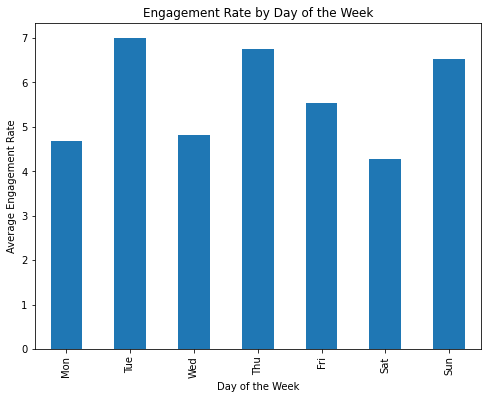

In [ ]:
data = pd.read_excel(file_path)
data['DayOfWeek'] = data['Published Date'].dt.dayofweek
data['DayOfWeekName'] = data['Published Date'].dt.strftime('%A')
data['Engagement Rate'] = (data['Total Engagements'] / data['Total Impressions']) * 100
data.dropna()
req_data = data[(data['Engagement Rate'] > 0) & (data['Engagement Rate'] <= 100)]
engagement_by_day = req_data.groupby('DayOfWeek')['Engagement Rate'].mean()
plt.figure(figsize=(8, 6))
engagement_by_day.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Average Engagement Rate')
plt.title('Engagement Rate by Day of the Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

C:\Users\Checkout\AppData\Local\Temp\ipykernel_8276\1557407482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_data['HourOfDay'] = data['Published Date'].dt.hour


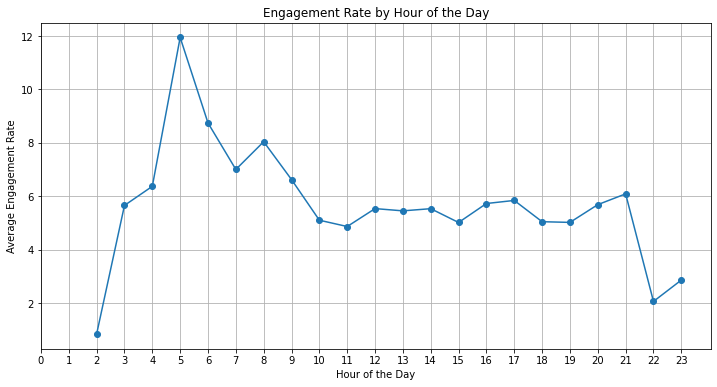

In [ ]:
req_data['HourOfDay'] = data['Published Date'].dt.hour
engagement_by_hour = req_data.groupby('HourOfDay')['Engagement Rate'].mean()
plt.figure(figsize=(12, 6))
engagement_by_hour.plot(kind='line', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagement Rate')
plt.title('Engagement Rate by Hour of the Day')
plt.xticks(range(24))
plt.grid(True)
plt.show()

### Engagement rate is highest on the days Tuesday, Thursday, and Sunday.
### Peak Engagement Rate is observed in 5th hour of the day

In [ ]:
req_data

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,DayOfWeek,DayOfWeekName,Engagement Rate,HourOfDay
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video,4,Friday,12.766628,19
6,2023-03-31 19:40:57.383,CSGO,TWITTER,Community Engagement,1882.0,83.0,Photo,4,Friday,4.410202,19
7,2023-03-31 19:23:57.349,CSGO,TWITTER,Community Engagement,17892.0,3076.0,Video,4,Friday,17.192041,19
9,2023-03-31 18:55:51.855,CSGO,TWITTER,Community Engagement,13874.0,1447.0,Video,4,Friday,10.429581,18
10,2023-03-31 18:36:01.000,General,FBPAGE,Community Engagement,37692.0,8044.0,Photo,4,Friday,21.341399,18
...,...,...,...,...,...,...,...,...,...,...,...
3463,2023-01-04 13:17:28.473,General,TWITTER,N/A,393.0,18.0,Text,2,Wednesday,4.580153,13
3464,2023-01-04 13:00:02.187,General,TWITTER,Community Engagement,136660.0,2371.0,Photo,2,Wednesday,1.734963,13
3465,2023-01-04 13:00:01.000,General,FBPAGE,Community Engagement,29051.0,811.0,Photo,2,Wednesday,2.791642,13
3470,2023-01-03 13:34:33.887,General,TWITTER,N/A,7704.0,153.0,Text,1,Tuesday,1.985981,13


### Performance of Game Titles in Social Media


In [ ]:
data['Account'].value_counts()

General             2271
DOTA2                803
CSGO                 270
Valorant              60
Content Creators      53
General               22
Name: Account, dtype: int64

### Data inconsistency has been found in 'General' type of account

In [ ]:
data['Account'] = data['Account'].str.strip().str.lower()
data['Account'].value_counts()

general             2293
dota2                803
csgo                 270
valorant              60
content creators      53
Name: Account, dtype: int64

In [ ]:
req_data['Account'] = req_data['Account'].str.strip().str.lower()
req_data['Account'].value_counts()

C:\Users\Checkout\AppData\Local\Temp\ipykernel_8276\1102620369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_data['Account'] = req_data['Account'].str.strip().str.lower()


general             1556
dota2                691
csgo                 198
content creators      34
valorant              31
Name: Account, dtype: int64

In [ ]:
impressions_by_account = data.groupby('Account')['Total Impressions'].sum()
best_performing_account = impressions_by_account.nlargest(1)
least_performing_account = impressions_by_account.nsmallest(1)
print("Best performing account:")
print(best_performing_account)

print("\nLeast performing account:")
print(least_performing_account)


Best performing account:
Account
general    33931757.0
Name: Total Impressions, dtype: float64

Least performing account:
Account
valorant    22979.0
Name: Total Impressions, dtype: float64


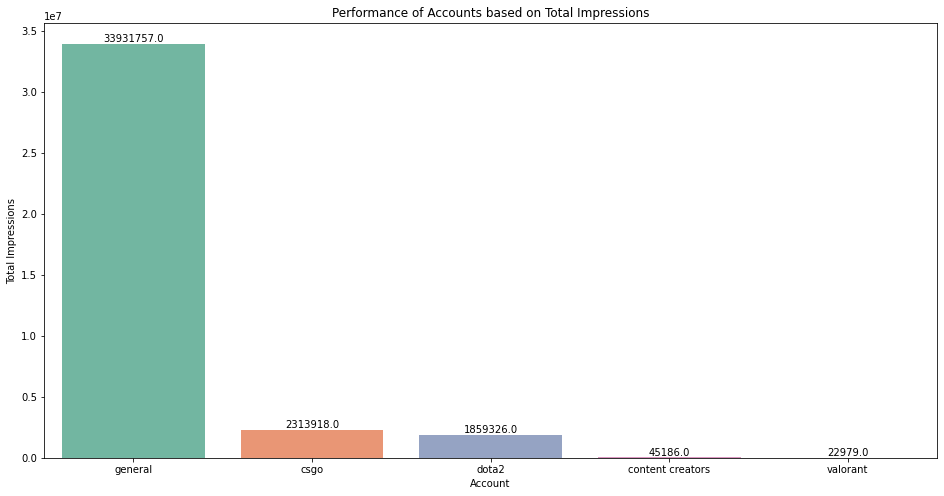

In [ ]:
impressions_by_account = data.groupby('Account')['Total Impressions'].sum()
sorted_impressions = impressions_by_account.sort_values(ascending=False)
fig, ax = plt.subplots()
sns.barplot(x=sorted_impressions.index, y=sorted_impressions, palette="Set2", ax=ax)
plt.xlabel('Account')
plt.ylabel('Total Impressions')
plt.title('Performance of Accounts based on Total Impressions')
for i, v in enumerate(sorted_impressions):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.xticks()
plt.show()

### General Account has the highest Impressions while valorant has the least impressions 

In [ ]:
engagements_by_account = data.groupby('Account')['Total Engagements'].sum()
best_performing_account = engagements_by_account.nlargest(1)
least_performing_account = engagements_by_account.nsmallest(1)
print("Best performing account:")
print(best_performing_account)

print("\nLeast performing account:")
print(least_performing_account)

Best performing account:
Account
general    3077328.0
Name: Total Engagements, dtype: float64

Least performing account:
Account
valorant    931.0
Name: Total Engagements, dtype: float64


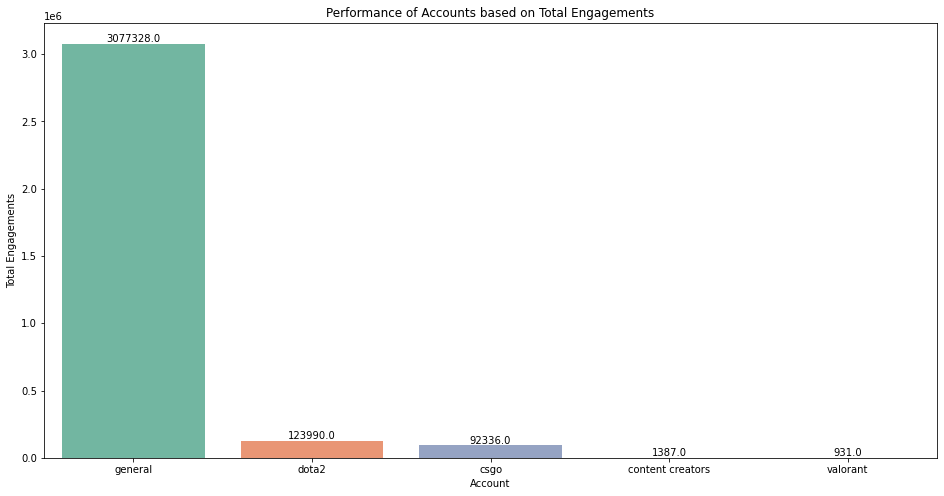

In [ ]:
engagements_by_account = data.groupby('Account')['Total Engagements'].sum()
sorted_engagements = engagements_by_account.sort_values(ascending=False)
fig, ax = plt.subplots()
sns.barplot(x=sorted_engagements.index, y=sorted_engagements, palette="Set2", ax=ax)
plt.xlabel('Account')
plt.ylabel('Total Engagements')
plt.title('Performance of Accounts based on Total Engagements')
for i, v in enumerate(sorted_engagements):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.xticks()
plt.show()

### General account has the highest number of Engagements 

In [ ]:
engagement_mean = req_data.groupby('Account')['Engagement Rate'].mean().sort_values(ascending=False)
engagement_mean

Account
general             6.389059
content creators    6.353192
valorant            5.854570
dota2               4.994979
csgo                4.132564
Name: Engagement Rate, dtype: float64

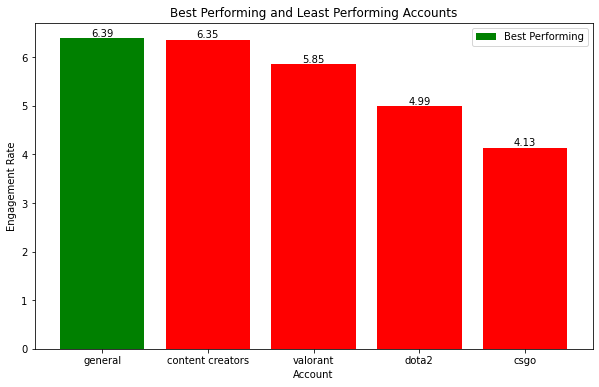

In [ ]:
top_accounts = engagement_mean.head(1)
bottom_accounts = engagement_mean.tail(1)
colors = ['green' if account in top_accounts else 'red' for account in engagement_mean.index]
plt.figure(figsize=(10, 6))
plt.bar(engagement_mean.index, engagement_mean, color=colors)
plt.xlabel('Account')
plt.ylabel('Engagement Rate')
plt.title('Best Performing and Least Performing Accounts')
plt.legend(['Best Performing', 'Least Performing'])
for i, rate in enumerate(engagement_mean):
    plt.text(i, rate, f'{rate:.2f}', ha='center', va='bottom')
plt.xticks()
plt.show()


### Although the engagement rates have a very close values but the General Account have a very large number of Impressions and Engagements when compared to the other Account types. 
### Other than the 'General' game title all other titles need to be concentrated more.

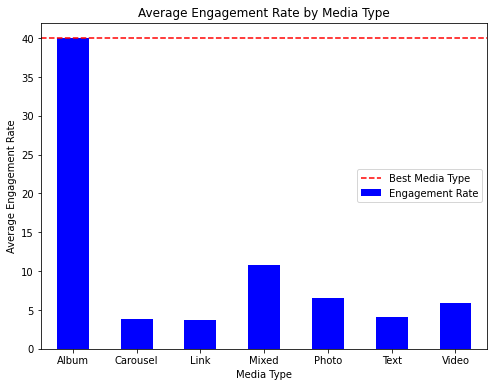

The media type that performs the best is: Album


In [ ]:
media_engagement = req_data.groupby('Media Type')['Engagement Rate'].mean()
best_media_type = media_engagement.idxmax()
plt.figure(figsize=(8, 6))
media_engagement.plot(kind='bar', color='blue')
plt.xlabel('Media Type')
plt.ylabel('Average Engagement Rate')
plt.title('Average Engagement Rate by Media Type')
plt.axhline(media_engagement[best_media_type], color='red', linestyle='--', label='Best Media Type')
plt.legend()
plt.xticks(rotation=0)
plt.show()
print("The media type that performs the best is:", best_media_type)

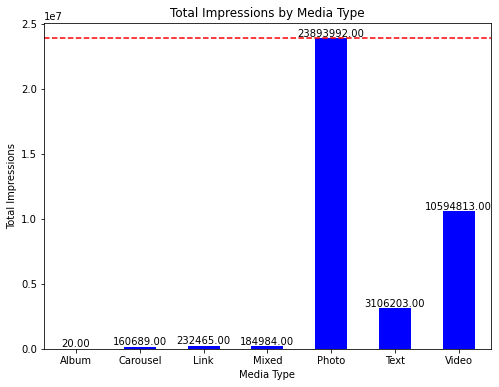

The media type with the highest total impressions is: Photo


In [ ]:
media_impressions = data.groupby('Media Type')['Total Impressions'].sum()
best_media_type = media_impressions.idxmax()
plt.figure(figsize=(8, 6))
media_impressions.plot(kind='bar', color='blue')
plt.xlabel('Media Type')
plt.ylabel('Total Impressions')
plt.title('Total Impressions by Media Type')
plt.axhline(media_impressions[best_media_type], color='red', linestyle='--', label='Best Media Type')

for i, rate in enumerate(media_impressions):
    plt.text(i, rate, f'{rate:.2f}', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

print("The media type with the highest total impressions is:", best_media_type)


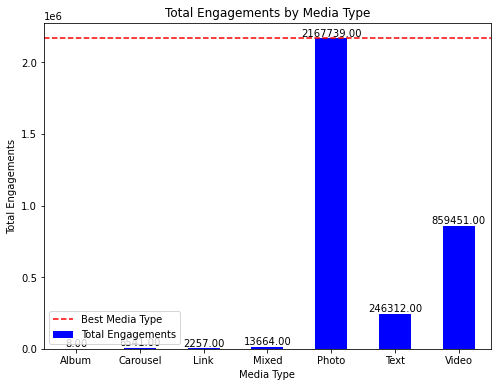

The media type with the highest total engagements is: Photo


In [ ]:
media_engagements = data.groupby('Media Type')['Total Engagements'].sum()
best_media_type = media_engagements.idxmax()
plt.figure(figsize=(8, 6))
media_engagements.plot(kind='bar', color='blue')
plt.xlabel('Media Type')
plt.ylabel('Total Engagements')
plt.title('Total Engagements by Media Type')
plt.axhline(media_engagements[best_media_type], color='red', linestyle='--', label='Best Media Type')

plt.legend()
for i, rate in enumerate(media_engagements):
    plt.text(i, rate, f'{rate:.2f}', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

print("The media type with the highest total engagements is:", best_media_type)


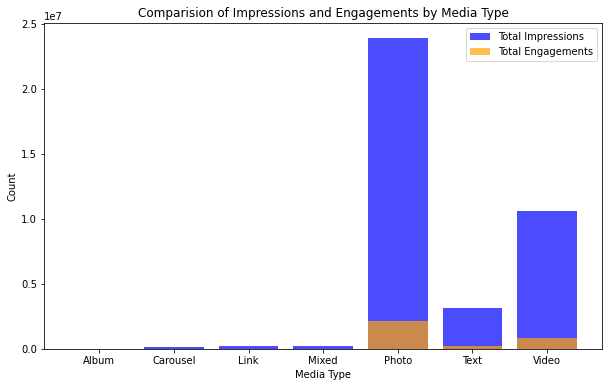

In [ ]:
media_impressions = data.groupby('Media Type')['Total Impressions'].sum()
media_engagements = data.groupby('Media Type')['Total Engagements'].sum()
plt.figure(figsize=(10, 6))
plt.bar(media_impressions.index, media_impressions, label='Total Impressions', color='blue', alpha=0.7)
plt.bar(media_engagements.index, media_engagements, label='Total Engagements', color='orange', alpha=0.7)

plt.xlabel('Media Type')
plt.ylabel('Count')
plt.title('Comparision of Impressions and Engagements by Media Type')
plt.legend()

plt.xticks(rotation=0)
plt.show()


### Album Media type has the best Engagement Rate 
### But when considered the total number of impressions and engagements Photo and Video types of media have the highest numbers

In [ ]:
data['Campaign Name'].value_counts()

N/A                      1485
Community Engagement     1411
Evil Exhibited            420
Evergreen                 163
Name: Campaign Name, dtype: int64

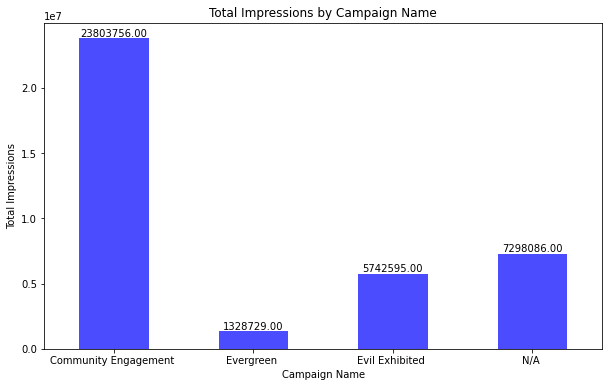

In [ ]:
campaign_impressions = data.groupby('Campaign Name')['Total Impressions'].sum()
plt.figure(figsize=(10, 6))
campaign_impressions.plot(kind='bar', color='blue', alpha=0.7)

plt.xlabel('Campaign Name')
plt.ylabel('Total Impressions')
plt.title('Total Impressions by Campaign Name')
for i, rate in enumerate(campaign_impressions):
    plt.text(i, rate, f'{rate:.2f}', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()


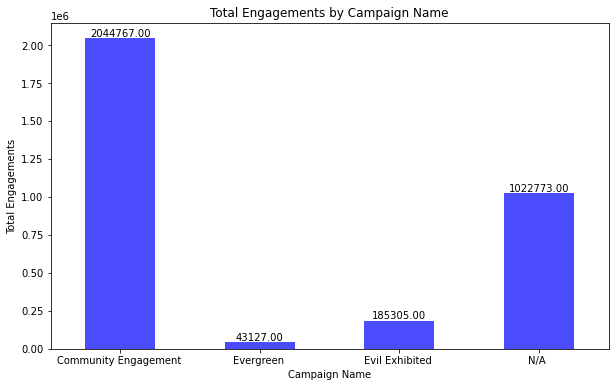

In [ ]:
campaign_engagements = data.groupby('Campaign Name')['Total Engagements'].sum()
plt.figure(figsize=(10, 6))
campaign_engagements.plot(kind='bar', color='blue', alpha=0.7)

plt.xlabel('Campaign Name')
plt.ylabel('Total Engagements')
plt.title('Total Engagements by Campaign Name')
for i, rate in enumerate(campaign_engagements):
    plt.text(i, rate, f'{rate:.2f}', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()


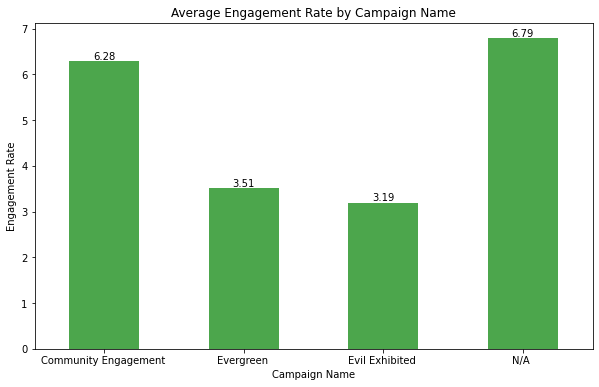

In [ ]:
campaign_engagement = req_data.groupby('Campaign Name')['Engagement Rate'].mean()
plt.figure(figsize=(10, 6))
campaign_engagement.plot(kind='bar', color='green', alpha=0.7)

plt.xlabel('Campaign Name')
plt.ylabel('Engagement Rate')
plt.title('Average Engagement Rate by Campaign Name')
for i, rate in enumerate(campaign_engagement):
    plt.text(i, rate, f'{rate:.2f}', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()


### Community Engagement is the best-performing campaign.
### Evergreen Campaign has the least number of impressions and engagements

### Based on the findings and analysis 
I would suggest diversifying your game title posts beyond the categories of 'General'. By expanding the range of platforms you utilize, particularly those with higher social reach such as Twitter and Facebook you can effectively engage with a wider audience.

In addition, incorporating various types of media such as photos and videos can significantly enhance your community engagement efforts. Visual content tends to capture attention more effectively and encourages higher levels of interaction. By sharing screenshots, gameplay clips, or even behind-the-scenes footage, you can generate excitement, curiosity, and discussions among your followers.

Consider implementing a well-rounded posting strategy that includes tailored content for each platform. For instance, you could share teasers and updates on Twitter and Facebook, while focusing on visually appealing posts on Instagram with captivating images and short videos. For longer gameplay showcases or tutorials, YouTube can be an excellent platform. Lastly, TikTok provides a great opportunity for creating engaging and entertaining snippets that resonate with a younger, more trend-focused audience.

Remember to analyze and monitor the engagement metrics for each platform to gauge the effectiveness of your posting strategy. This will allow you to refine your approach and optimize your content to better resonate with your community.

